In [1]:
%matplotlib notebook 
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/pablo/code/name-color


In [3]:
import json
import itertools
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

#import matplotlib
from os.path import join
from IPython.display import HTML
from matplotlib import animation, rc
from mpl_toolkits.mplot3d import Axes3D

from settings import DATA_PATH
sns.set(color_codes=True)

In [4]:
with open(join(DATA_PATH, "colors_train.jsonl"), "r") as f:
    data = [json.loads(r) for r in f.readlines()]

In [5]:
data[7]

{'name': ['s',
  'w',
  'e',
  'e',
  't',
  ' ',
  'l',
  'i',
  'k',
  'e',
  ' ',
  'r',
  'o',
  's',
  'e',
  's'],
 'lab': [50.95223708545244, 78.33595906431762, -8.895720851756073],
 'rgb': [230, 21, 139]}

In [6]:
len(data)

468324

In [7]:
names = [r["name"] for r in data]
name_length = [ len(n) for n in names]

<IPython.core.display.Javascript object>


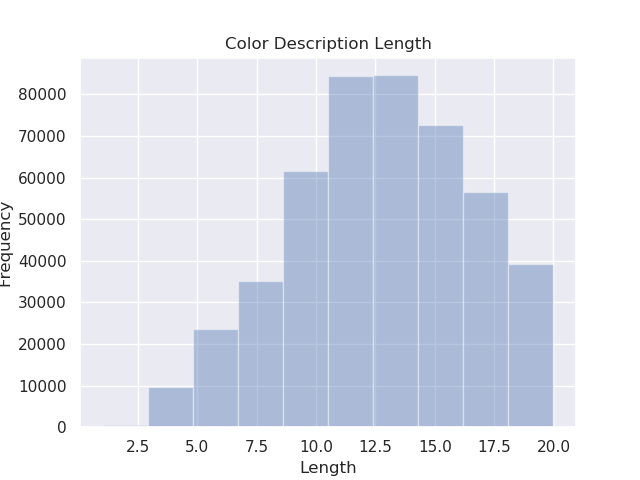

In [11]:
plt.subplots()
sns.distplot(name_length, bins=10, kde=False).set_title("Color Description Length")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.savefig("1.png")
#plt.show()

In [14]:
name_chars = [ name for name in names  ] 
name_char_counter = collections.Counter(itertools.chain(*name_chars))

In [15]:
name_char_counter.most_common()

[('e', 646990),
 (' ', 587515),
 ('a', 440368),
 ('i', 379571),
 ('r', 377653),
 ('o', 374373),
 ('n', 351199),
 ('s', 347479),
 ('t', 339793),
 ('l', 324969),
 ('u', 194979),
 ('d', 190960),
 ('h', 175929),
 ('c', 172035),
 ('m', 163512),
 ('g', 156756),
 ('p', 147374),
 ('y', 134689),
 ('b', 126839),
 ('f', 99253),
 ('w', 85868),
 ('k', 83683),
 ('v', 60610),
 ('z', 17086),
 ('j', 14254),
 ('x', 9994),
 ('q', 9770)]

<IPython.core.display.Javascript object>


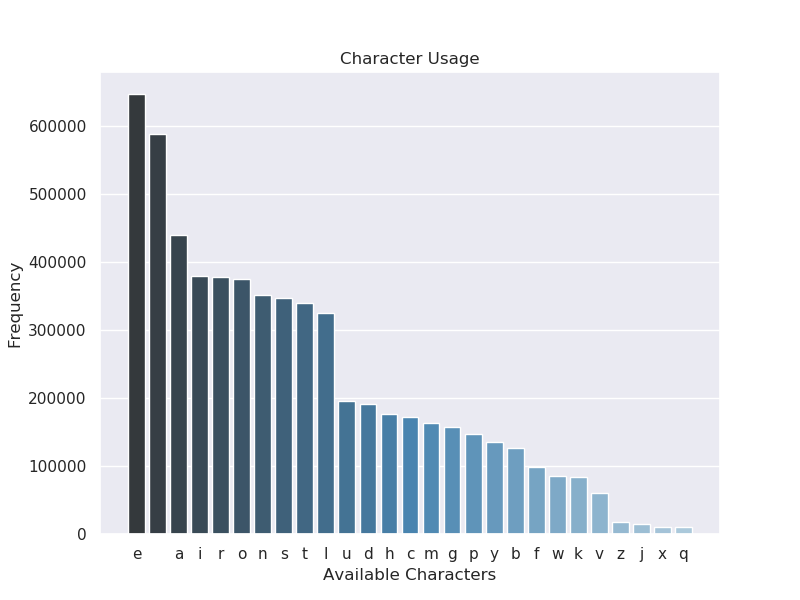

[]

In [17]:
plt.subplots(figsize=(8,6))

sns.barplot([a[0] for a  in name_char_counter.most_common()], 
            [a[1] for a  in name_char_counter.most_common()],
           palette='Blues_d' ).set_title("Character Usage")
plt.ylabel("Frequency")
plt.xlabel("Available Characters")
plt.savefig("2.png")
plt.plot()

In [19]:
colors_lab, colors_rgb = zip(*[(c["lab"],c["rgb"]) for c in data[:1000]])

<IPython.core.display.Javascript object>


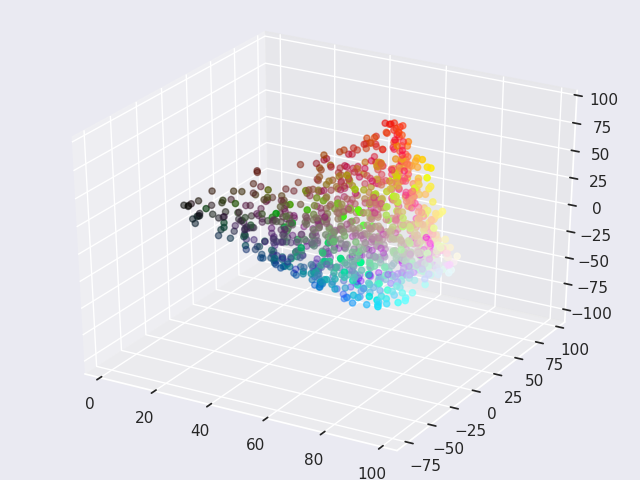

In [20]:
l,a,b = zip(*colors_lab)
rgb = [ (1.0*i[0]/255, 1.0*i[1]/255, 1.0*i[2]/255) for i in colors_rgb]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(l, a, b, facecolors=np.asarray(rgb))